# Root Finding

In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


One thing we want to be able to do compare two different algorithms that compute the same result.

Many numerical algorithms operate through some sort of iterative process, where we get better and better approximations to the answer at each iteration.

One example of this is [Newton's method](https://en.wikipedia.org/wiki/Newton%27s_method) for root finding.  A **root** of a continuous function $f$ is a value $x$ so that $f(x) = 0$.

Given a function $f$, we would like to find some root $x$. Newton's method computes a sequence of iterations
$$ x_{k+1} = x_{k} - \frac{f(x_{k})}{f'(x_{k})}$$

In [19]:
def newton_root(f, fp, x=1, tol=1e-4):
    """
    numerically approximate a root of f using Newton's method
    
    inputs:
        f - function
        fp - derivative of function f
        x - starting point (default 1)
        tol - tolerance for terminating the algorithm (default 1e-4)
    
    returns:
        x - the root
        iters = a list of all x visited
        fs - f(x) for each iteration
    """
    fx = f(x)
    iters = []
    fs = []
    while (abs(fx) > tol):
        x = x - fx / fp(x)
        fx = f(x)
        iters.append(x)
        fs.append(fx)
        
    return x, iters, fs

The idea is that if we draw a straight line with slope $f'(x_k)$ through the point $(x_k, f(x_k))$, the intercept would be at $x_{k+1}$.

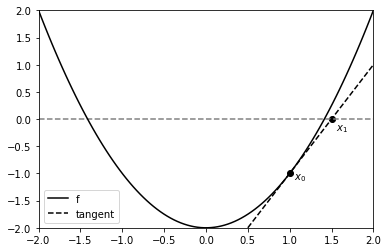

In [20]:
f = lambda x : x**2 - 2
fp = lambda x : 2*x

xmin, xmax = -2, 2
xs = np.linspace(xmin, xmax, 100)
x0 = 1
plt.plot(xs, f(xs), 'k-', label='f') # plot the function
plt.hlines(0, xmin, xmax, colors='gray', linestyles='dashed') # dashed line for y = 0
plt.scatter(x0, f(x0), c='k')
plt.text(x0 + 0.05, f(x0) - 0.1, r'$x_0$') # x0 label
x1 = x0 - f(x0)/fp(x0)
plt.plot(xs, fp(x0)*(xs - x1), 'k--', label='tangent')
plt.scatter(x1, 0, c='k')
plt.text(x1 + 0.05, -0.2, r'$x_1$') # x1 label
plt.xlim(xmin, xmax)
plt.ylim(xmin, xmax)
plt.legend()
plt.show()

In [21]:
f = lambda x : x**2 - 2
fp = lambda x : 2*x

x , ix, iy = newton_root(f, fp)
print(x)

print(np.sqrt(2)) # roots are +- sqrt(2)

x, ix, iy = newton_root(f, fp, x=-1)
print(x)

1.4142156862745099
1.4142135623730951
-1.4142156862745099


Another root finding algorithm is the [bisection method](https://en.wikipedia.org/wiki/Bisection_method).  This operates by narrowing an interval which is known to contain a root.  Assuming $f$ is continuous, we can use the [intermediate value theorem](https://en.wikipedia.org/wiki/Intermediate_value_theorem). We know that if $f(a) < 0$, and $f(b) > 0$, there must be some $c\in (a,b)$ so that $f(c) = 0$.  At each iteration, we narrow the interval by looking at the midpoint $c = (a + b)/2$ and then looking at the interval $(a,c)$ or the interval $(c,b)$ depending on which one contains a root based on the intermediate value theorem.

### Exercise

Implement the bisection method as a recursive function.

In [5]:
## Your code here


Here's a sequential implementation which keeps track of the iterates.

In [6]:
def bisection_root(f, lb=-1, ub=1, tol=1e-4):
    """
    numerically approximate a root of f using bisection method
    
    assume signs of f(inf), f(-inf) are different
    
    inputs:
        f - function
        lb - lower bound of interval containing root
        ub - upper bound of interval containing root
        tol - tolerance for terminating the algorithm (default 1e-4)
    
    returns
        x - the root
        iters = a list of all x visited
        fs - f(x) for each iteration
    """
    # first increase range until signs of f(lb), f(ub) are different
    while f(lb) * f(ub) > 0:
        lb *= 2
        ub *= 2
        
        
    iters = []
    fs = []
    
    # see if we found a root with one of our bounds
    if abs(f(lb)) < tol:
        return lb, iters, fs
    if abs(f(ub)) < tol:
        return ub, iters, fs
        
    # make lb correspond to negative sign
    if f(lb) > 0:
        # swap upper and lower
        lb, ub = ub, lb
        
    while True:
        x = (ub + lb)/2.0 # mean
        iters.append(x)
        
        fx = f(x)
        fs.append(fx)
        if abs(fx) < tol:
            # found a root
            return x, iters, fs
        elif fx > 0:
            # f(x) > 0
            ub = x
        else:
            # f(x) < 0
            lb = x

In [7]:
f = lambda x : (x - 2)*(x + 3)*(x + 5)
x, ix, iy = bisection_root(f)
x

2

Let's test these two methods on the same function

In [8]:
f = lambda x : x**3 + 2*x**2 + 5*x + 1
fp = lambda x : 3*x**2 + 4*x + 5

tol = 1e-8

x_newton, iter_newton, f_newton = newton_root(f, fp, tol=tol)
x_bisect, iter_bisect, f_bisect = bisection_root(f, tol=tol)

print(x_newton, x_bisect)
print(np.abs(x_newton - x_bisect))

-0.21675657195055742 -0.21675657108426094
8.662964789962757e-10


Let's see how many iterations each method performed

In [9]:
print(len(iter_newton))
print(len(iter_bisect))

5
29


It looks like one algorithm is converging faster than the other - let's track how close each iteration is to a root:

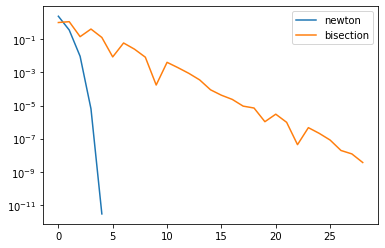

In [10]:
plt.semilogy(np.abs(f_newton), label="newton")
plt.semilogy(np.abs(f_bisect), label="bisection")
plt.legend()
plt.show()

The below function comes from the section on [convergence](../01_analysis/convergence.ipynb):

In [11]:
def estimate_q(eps):
    """
    estimate rate of convergence q from sequence esp
    """
    x = np.arange(len(eps) -1)
    y = np.log(np.abs(np.diff(np.log(eps))))
    line = np.polyfit(x, y, 1) # fit degree 1 polynomial
    q = np.exp(line[0]) # find q
    return q

In [12]:
print(estimate_q(np.abs(f_newton)))
print(estimate_q(np.abs(f_bisect)))

1.97097165113398
1.0000974769330462


experimentally, we see that the bisection converges linearly, and Newton's method converges close to its theoretical guarantee of quadratically.

## Exercise

Prove that the bisection method converges linearly.

```{admonition} Sketch of Answer
:class: dropdown
Let $L = |b - a|$ be the inital width of the interval that contains the root.  The maximum distance to the root from either $a$ or $b$ is $L$, so $\epsilon_0 \le L$. At each step of the algorithm, we look at the midpoint, and reduce the length of the interval we are looking at by 2.  This means $\epsilon_k \le L/2^k$. We now look at the ratio $\epsilon_{k+1}/\epsilon_k \sim 1/2$, so the algorithm converges linearly. 

*Note you would need to be a bit more careful with the ratio to really prove convergence.*
```

## An Application of Decorators

While Newton's method converges faster, it required us to provide the derivative of the function we're trying to find a root for.  This might not always be easy to implement.

Instead, we might consider numerically approximating the derivative.  Recall
$$f'(x) = \lim_{h\to 0^+} \frac{f(x) - f(x + h)}{h}$$
We'll use the symmetric definition
$$f'(x) = \lim_{h\to 0^+} \frac{f(x+h) - f(x - h)}{2h}$$

Let's define a non-limit version
$$\Delta_h f(x) = \frac{f(x + h) - f(x - h)}{2h}$$
for fixed $x$, if $h$ is sufficiently small, then $\Delta_h f \approx f'$ near $x$.  $\Delta_h f$ is known as *finite difference*.

We can explicitly define a numerical derivative of a function $f$ via

In [13]:
def delta(f, h=1e-8):
    
    def wrapper(x):
        return (f(x + h) - f(x - h))/(2*h)
    
    return wrapper

In [14]:
f = lambda x : (x - np.sqrt(2))*np.exp(-x**2)
fp = delta(f)

In [15]:
x_newton, iter_newton, f_newton = newton_root(f, fp, tol=1e-6)

In [16]:
len(iter_newton)

5

we might also consider defining a decorator that returns $f(x), \Delta_h(x)$ from a function definition

In [17]:
from functools import wraps

def add_numerical_derivative(f, default_h=1e-8):
    
    @wraps(f)
    def wrapper(x, h=default_h):
        ret = f(x)
        deriv = (f(x + h) - f(x - h)) / (2*h)
        return ret, deriv
    
    return wrapper
        
@add_numerical_derivative
def f(x):
    return (x - np.sqrt(2))*np.exp(-x**2)

f(0.5) # returns value, numerical derivative

(-0.7119902382706651, 1.4907910239614353)

In [18]:
f(0.5, h=1e-7)

(-0.7119902382706651, 1.4907910206307662)

## Exercise

Estimate the rate of convergence for Newton's method when we use a finite difference to approximate the derivative.

Does this change with the value of $h$?